In [1]:
import pandas as pd

In [2]:
emis = pd.read_excel('env_air_emis__custom_16946228_spreadsheet.xlsx', sheet_name=None) # Passing sheet_name=None returs a dict of all sheets

In [3]:
emis.keys()

dict_keys(['Data', 'org', 'pm10', 'pm25', 'nh3', 'sox', 'nox'])

In [8]:
def clean_data(df):
    df = df.copy()[2:]
    df.dropna(axis=1, how='all', inplace=True)
    index_name = 'NAME'
    df.rename(columns={'TIME': index_name}, inplace=True)
    df.set_index(index_name, inplace=True)
    return df

In [9]:
import geopandas as gpd

In [10]:
europe = gpd.read_file('https://raw.githubusercontent.com/leakyMirror/map-of-europe/27a335110674ae5b01a84d3501b227e661beea2b/GeoJSON/europe.geojson')

(-25.0, 45.0, 30.0, 72.0)

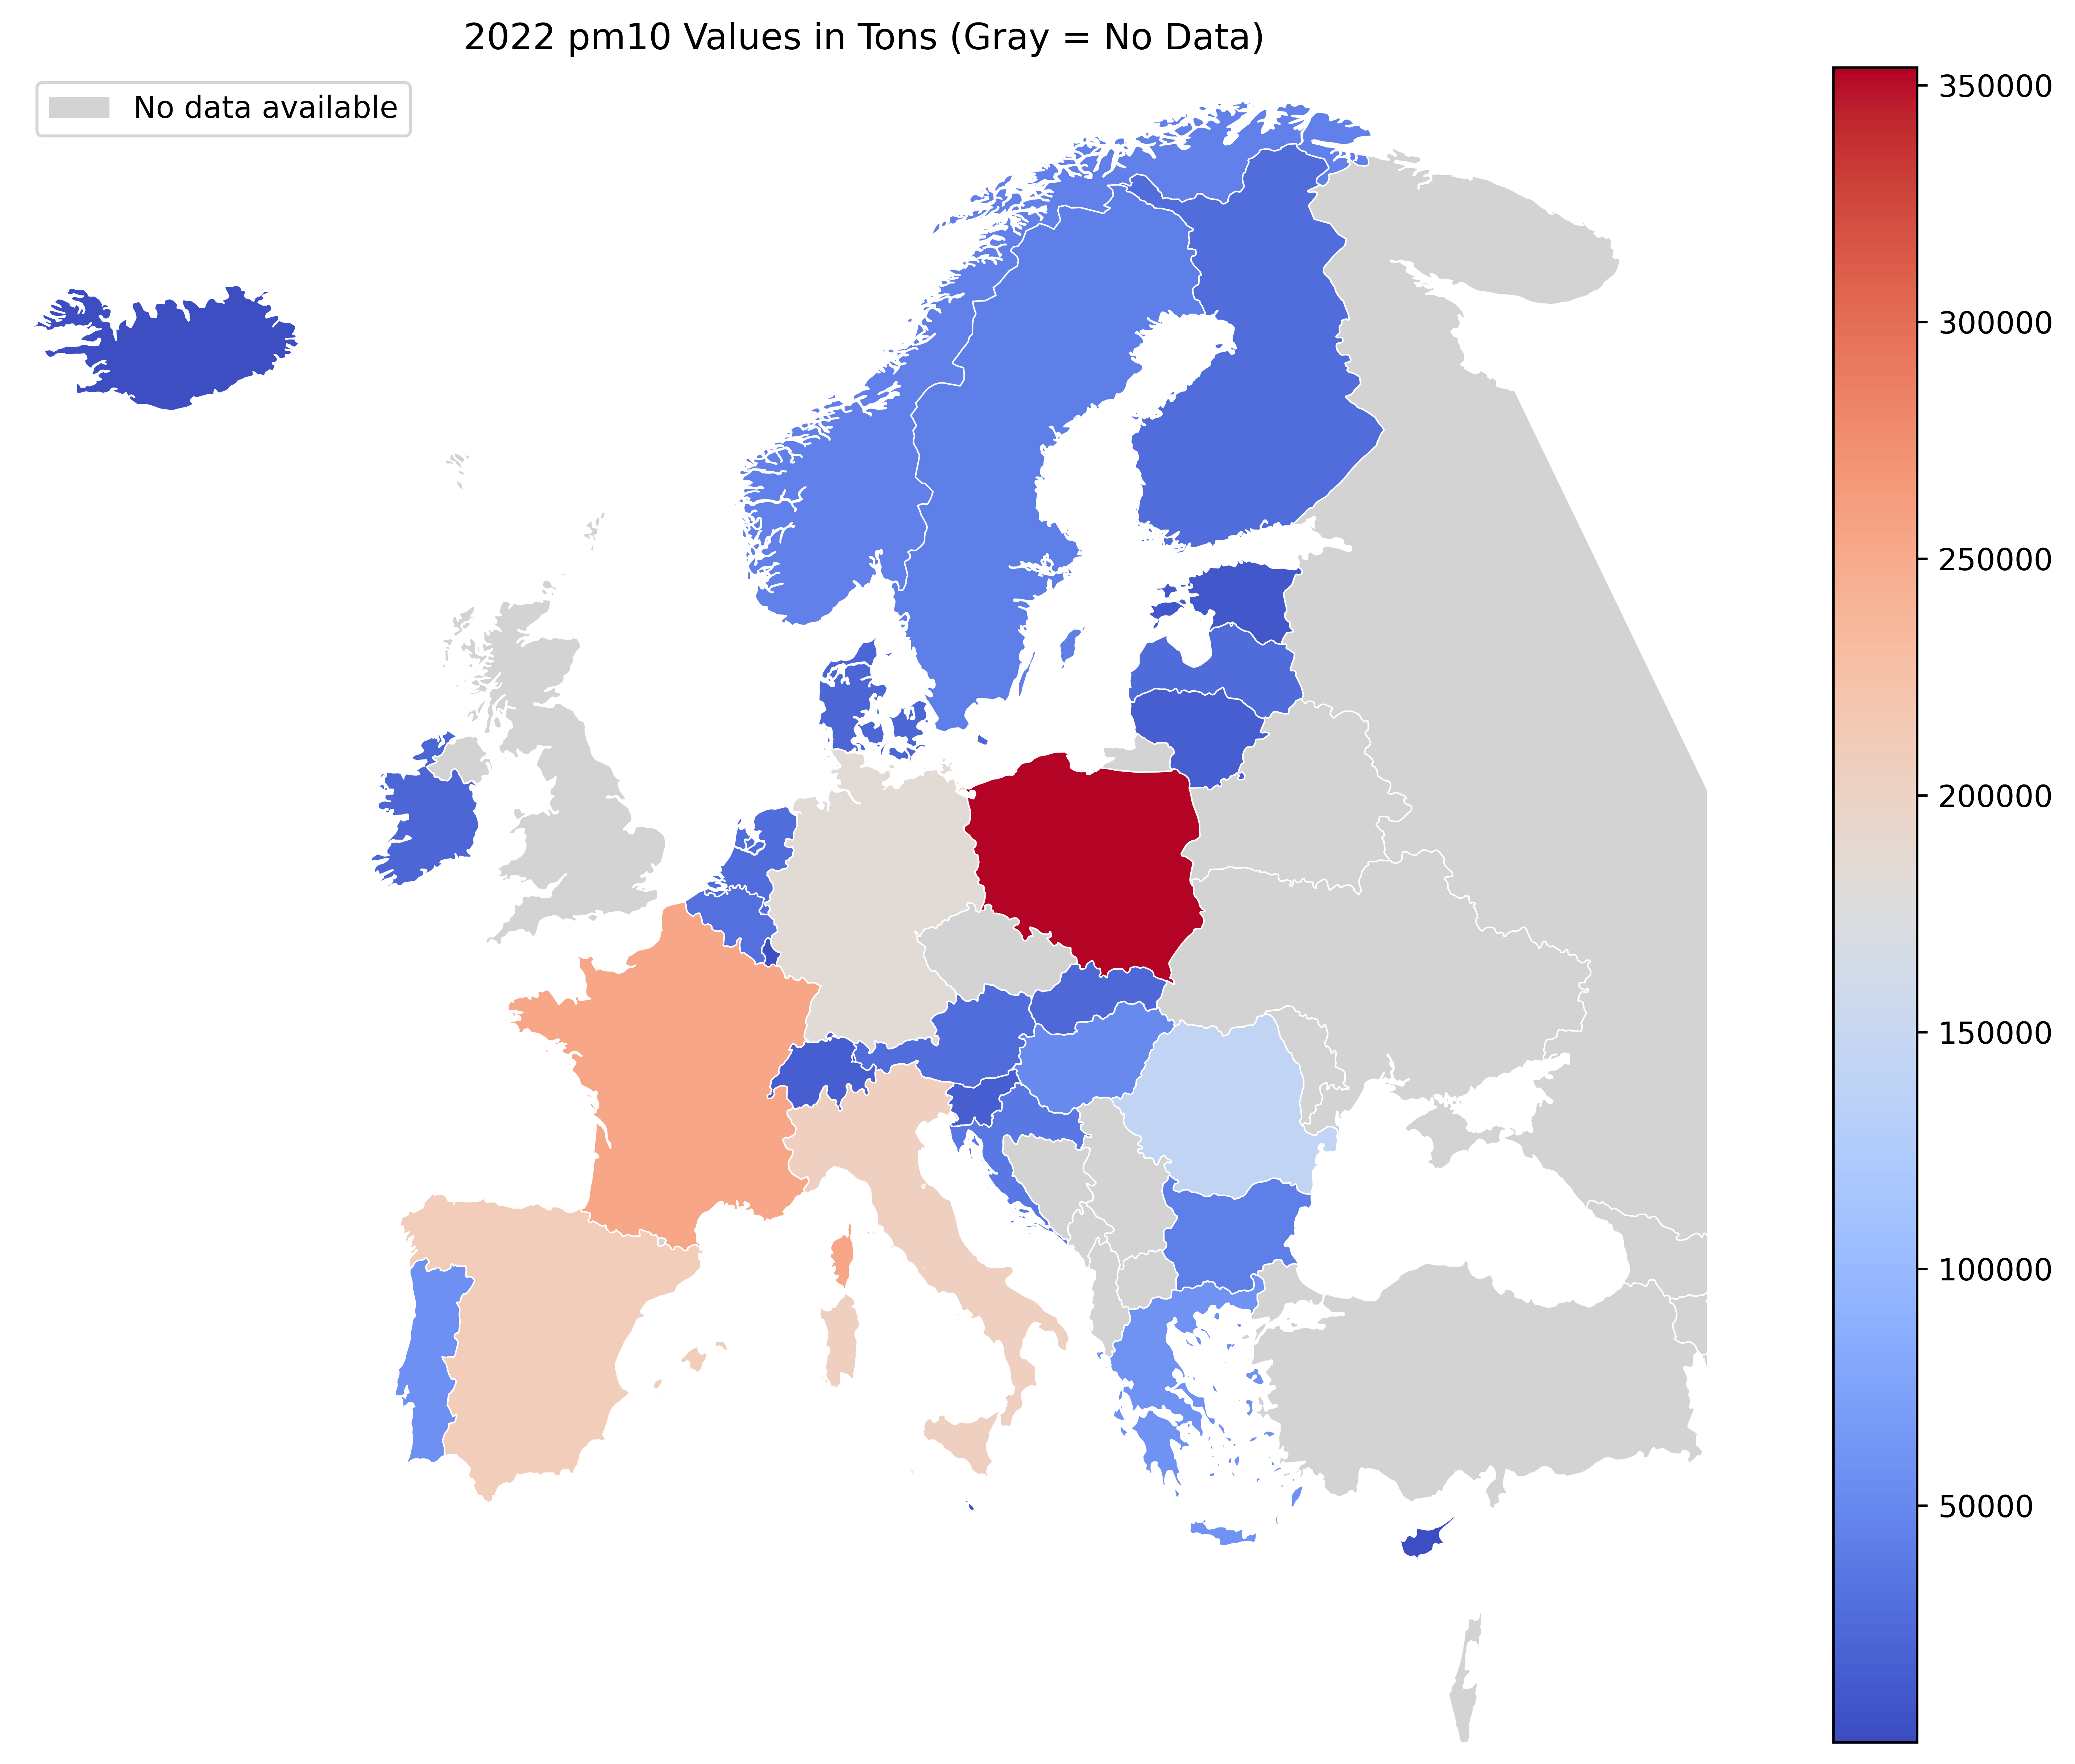

In [58]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10), dpi=600)

year = '2022'
pol = 'pm10'

pol_data = clean_data(emis[pol])

gdf = europe.join(pol_data, on='NAME', how='left')

no_data = gdf[gdf[year].isna()]
no_data.plot(ax=ax, color='lightgray', edgecolor='white', linewidth=0.5)

has_data = gdf[gdf[year].notna()]
has_data.plot(ax=ax, column=year, cmap='coolwarm', legend=True,
              edgecolor='white', linewidth=0.5)

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='lightgray', label='No data available')]
ax.legend(handles=legend_elements, loc='upper left')

ax.set_xlim(-25, 45)
ax.set_ylim(30, 72)
ax.set_title(f'{year} {pol} Values in Tons (Gray = No Data)')
ax.axis('off')

In [12]:
gdp_cap = pd.read_excel('gdp_yearly.xlsx', sheet_name='clean')

gdp_cap.head()

,Country,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Belgium,36000,37000,38000,39100,40300,41700,40200,43700,48200,50600
1,Bulgaria,6100,6600,7100,7700,8400,9300,9500,11000,13300,14700
2,Czechia,15100,16200,17000,18700,20300,21700,21000,23400,26700,29200
3,Denmark,47100,47900,49300,51100,52000,53000,53500,59000,64700,63300
4,Germany,36100,37000,38100,39500,40600,42500,41500,44200,47200,49500


In [13]:
import numpy as np
def fill_semicolons(x):
    if x == ':':
        return np.nan
    return x

In [138]:
pm10_2022 = clean_data(emis['pm10']).reset_index().rename(columns={'NAME':'Country'}).set_index('Country')['2022'].rename('pm10')

In [139]:
gdp_cap_2022 = gdp_cap.set_index('Country')[2022].map(fill_semicolons).rename('GDP per cap')

In [140]:
pop_df = pd.read_excel('pop.xlsx', sheet_name='clean')

In [141]:
pop = pop_df.iloc[1:].rename(columns={'TIME':'Country'}).set_index('Country')['2022'].rename('population').map(fill_semicolons)

In [142]:
pop

Country
Belgium            11617623.0
Bulgaria            6482484.0
Czechia            10516707.0
Denmark             5873420.0
Germany            83237124.0
Estonia             1331796.0
Ireland             5154277.0
Greece             10459782.0
Spain              47486843.0
France             68091703.0
Croatia             3862305.0
Italy              59030133.0
Cyprus               929764.0
Latvia              1875757.0
Lithuania           2805998.0
Luxembourg           645397.0
Hungary             9610403.0
Malta                520174.0
Netherlands        17590672.0
Austria             8978929.0
Poland             36889761.0
Portugal           10421117.0
Romania            19042455.0
Slovenia            2107180.0
Slovakia            5434712.0
Finland             5548241.0
Sweden             10452326.0
Iceland              376248.0
Liechtenstein         39308.0
Norway              5425270.0
Switzerland         8738791.0
United Kingdom            NaN
Montenegro           617683.0
No

In [143]:
gdp_2022 = pd.concat([gdp_cap_2022, pop], axis=1)

In [144]:
gdp_2022['gdp'] = gdp_2022['GDP per cap'] * gdp_2022['population']

In [145]:
gdp_2022

,GDP per cap,population,gdp
Country,,,
Belgium,48200.0,11617623.0,5.599694e+11
Bulgaria,13300.0,6482484.0,8.621704e+10
Czechia,26700.0,10516707.0,2.807961e+11
Denmark,64700.0,5873420.0,3.800103e+11
Germany,47200.0,83237124.0,3.928792e+12
Estonia,27400.0,1331796.0,3.649121e+10
Ireland,100200.0,5154277.0,5.164586e+11
Greece,19600.0,10459782.0,2.050117e+11
Spain,28700.0,47486843.0,1.362872e+12


In [159]:
raw_2022 = pd.concat([pm10_2022, gdp_2022], axis=1)

In [46]:
import seaborn as sns

<Axes: xlabel='gdp', ylabel='pm10'>

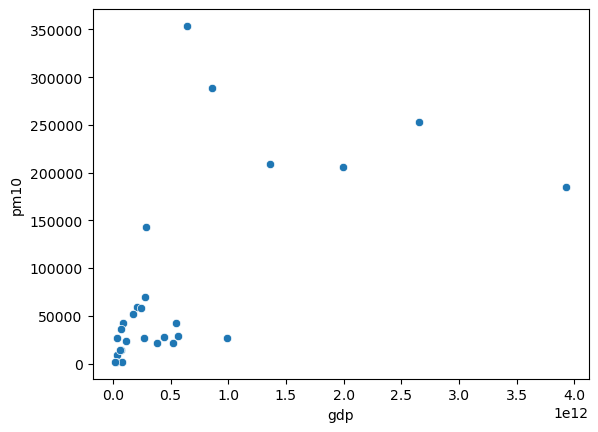

In [160]:
sns.scatterplot(raw_2022, x='gdp', y='pm10')

In [161]:
raw_2022['ratio'] = raw_2022['pm10'] / raw_2022['gdp']

In [182]:
col = dict(zip(raw_2022.dropna().index, ['#0082b4'] * len(raw_2022)))

<Axes: xlabel='population', ylabel='Country'>

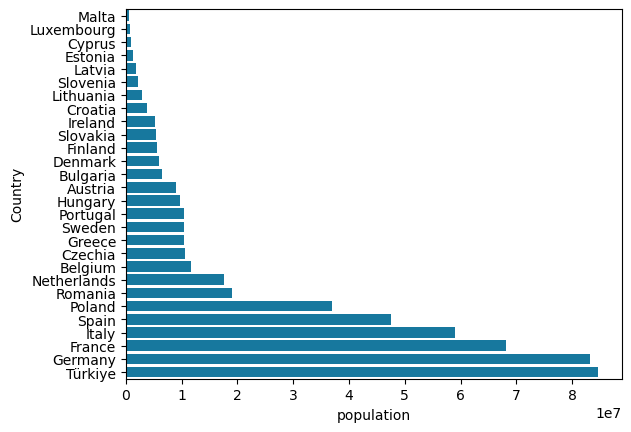

In [184]:
sns.barplot(raw_2022.reset_index().sort_values('population').dropna(), y='Country', x='population', palette=col)

<Axes: xlabel='gdp', ylabel='Country'>

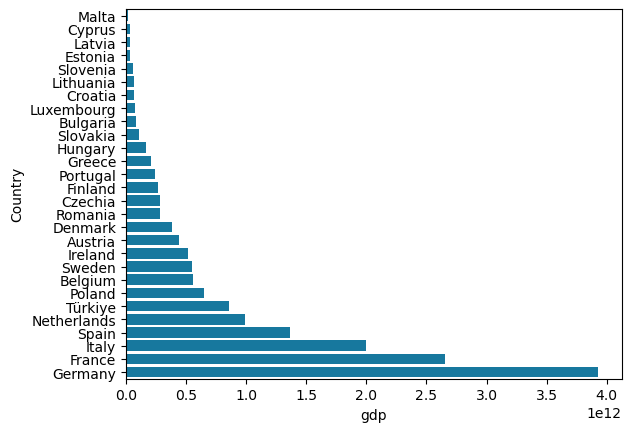

In [185]:
sns.barplot(raw_2022.reset_index().sort_values('gdp').dropna(), y='Country', x='gdp', palette=col)

<Axes: xlabel='pm10', ylabel='Country'>

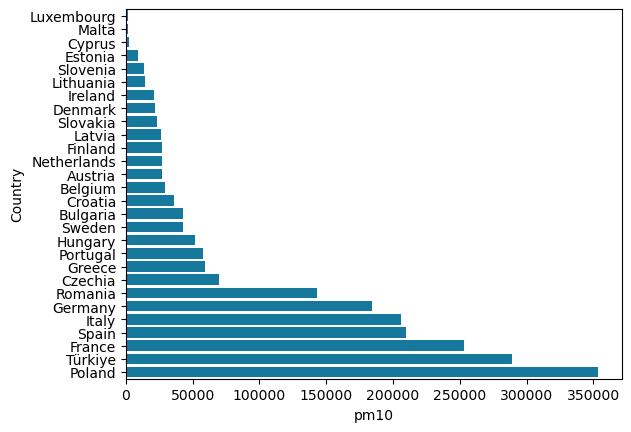

In [186]:
sns.barplot(raw_2022.reset_index().sort_values('pm10').dropna(), y='Country', x='pm10', palette=col)

<Axes: xlabel='ratio', ylabel='Country'>

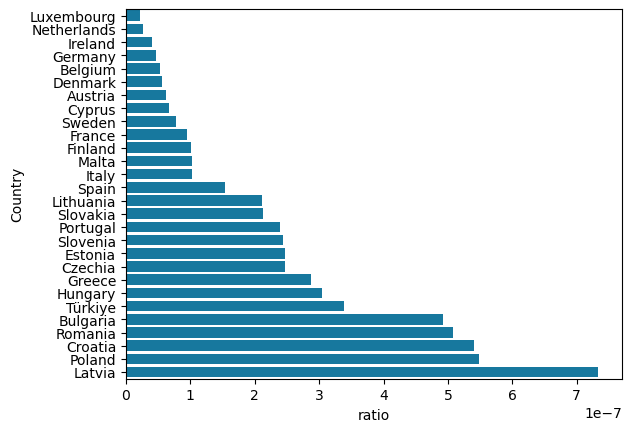

In [187]:
sns.barplot(raw_2022.reset_index().sort_values('ratio').dropna(), y='Country', x='ratio', palette=col)

(-25.0, 45.0, 30.0, 72.0)

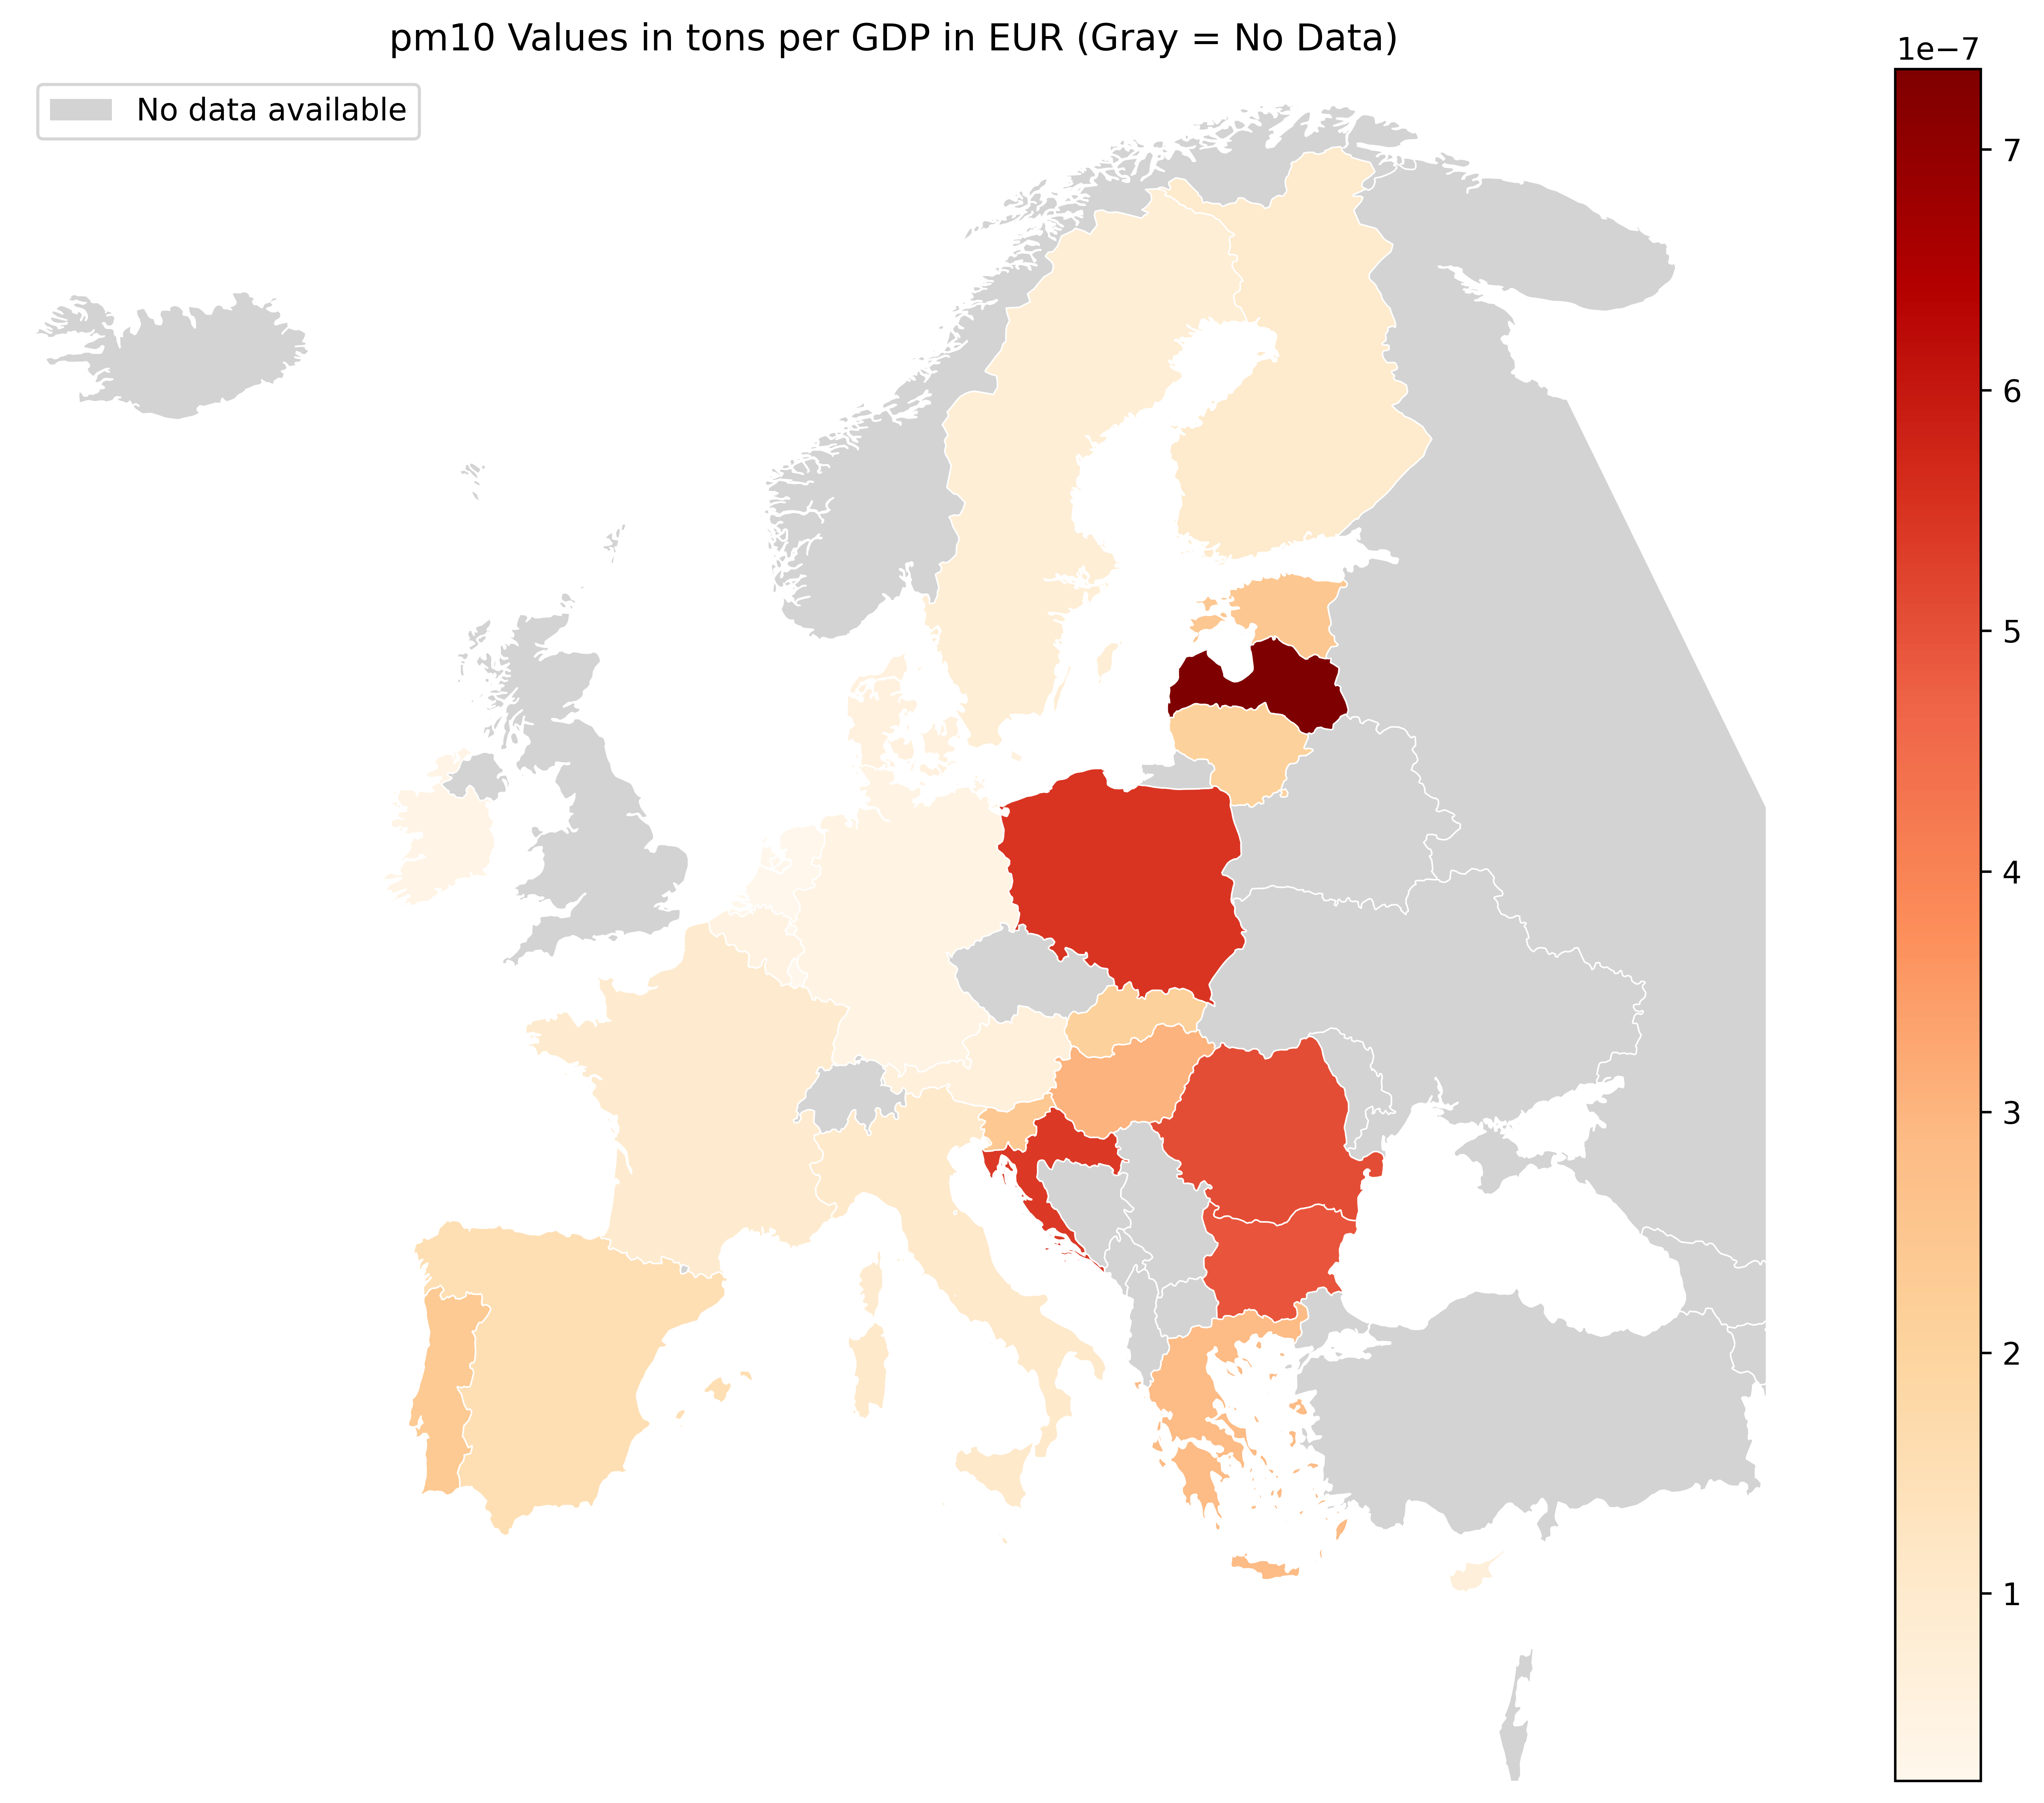

In [189]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10), dpi=600)



gdf = europe.join(raw_2022['ratio'], on='NAME', how='left')

no_data = gdf[gdf['ratio'].isna()]
no_data.plot(ax=ax, color='lightgray', edgecolor='white', linewidth=0.5)

has_data = gdf[gdf['ratio'].notna()]
has_data.plot(ax=ax, column='ratio', cmap='OrRd', legend=True,
              edgecolor='white', linewidth=0.5)

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='lightgray', label='No data available')]
ax.legend(handles=legend_elements, loc='upper left')

ax.set_xlim(-25, 45)
ax.set_ylim(30, 72)
ax.set_title(f'pm10 Values in tons per GDP in EUR (Gray = No Data)')
ax.axis('off')